# Análise Exploratória de Dados
---
- #### **RESUMO**
A análise exploratória de dados realizada neste notebook revelou várias informações importantes sobre o comportamento de churn dos clientes da empresa.

Primeiramente, a taxa geral de churn foi identificada em 26,5%, indicando que aproximadamente um quarto dos clientes cancelam o serviço. Ao analisar os tipos de serviço, descobriu-se que clientes que possuem ambos os serviços (internet e telefone) têm uma taxa de churn mais alta (32,8%) em comparação com aqueles que possuem apenas internet (18,1%) ou apenas telefone (10,7%).

Em relação ao serviço de telefonia, a diferença na taxa de churn entre clientes com e sem serviço de telefonia é pequena, sugerindo que este serviço tem pouca influência no churn. Clientes com múltiplas linhas telefônicas apresentam uma taxa de churn ligeiramente maior (28,6%) do que aqueles sem múltiplas linhas (25,1%).

O serviço de internet mostrou ser um atributo significativo, com clientes de fibra óptica apresentando a maior taxa de churn (41,9%). Clientes sem serviço de internet têm a menor taxa de churn (7,4%). Além disso, clientes que utilizam serviços de streaming têm uma taxa de churn mais alta (30,3%) em comparação com aqueles que utilizam serviços online (21,0%) ou serviços de segurança e assistência (21,7%).

A análise do número de serviços de internet revelou que clientes com nenhum serviço têm a maior taxa de churn (52,2%), enquanto aqueles com seis serviços têm a menor taxa (6,3%). Não houve diferença significativa na taxa de churn entre gêneros.

Clientes idosos têm uma taxa de churn mais alta (41,7%) em comparação com não idosos (23,6%). Clientes que têm parceiros têm uma taxa de churn menor (19,7%) em comparação com aqueles que não têm parceiros (33,0%). Clientes sem dependentes têm uma taxa de churn mais alta (31,3%) em comparação com aqueles com dependentes (15,5%).

O tipo de contrato também influencia a taxa de churn, com clientes de contratos mensais apresentando a maior taxa (42,7%), enquanto aqueles com contratos bienais têm a menor taxa (2,8%). Clientes que optam por faturamento digital têm uma taxa de churn mais alta (33,6%) em comparação com aqueles que escolhem faturamento em papel (16,3%).

Em relação ao método de pagamento, clientes que usam Eletronic Check têm a maior taxa de churn (45,3%), enquanto aqueles que usam métodos automáticos (transferência bancária ou cartão de crédito) têm a menor taxa (16,0%). Clientes com cobranças mensais entre 70-100 têm a maior taxa de churn (37,6%).

Por fim, a duração do contrato (tenure) é inversamente proporcional à taxa de churn, indicando que quanto maior a duração do contrato, menor a probabilidade de cancelamento do serviço. A correlação entre tenure e churn é de -0.3522.

Esses insights podem ajudar a empresa a identificar áreas para melhoria e desenvolver estratégias para reduzir a taxa de churn, como oferecer incentivos para contratos mais longos, melhorar a satisfação com serviços de streaming e revisar opções de faturamento e métodos de pagamento.

---
- #### **DATASET**

Este notebook explora dados utilizando um dataset extraído do [Telco Customer Churn no Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). Cada linha representa um cliente, e cada coluna contém os atributos do cliente conforme descrito no metadado. O dataset bruto consiste em 7.043 linhas (clientes) e 21 colunas (features). Não há valores nulos ou em branco nos dados.

In [1]:
import pandas as pd
import function as f

In [2]:
df = pd.read_csv('dataset/telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


| Coluna | Descrição |
| --- | --- |
| customerID | Identificação do cliente |
| gender | Gênero do cliente (Male, Female) |
| SeniorCitizen | Se o cliente é um idoso ou não (1, 0) |
| Partner | Se o cliente tem um parceiro ou não (Yes, No) |
| Dependents | Se o cliente tem dependentes ou não (Yes, No) |
| tenure | Número de meses que o cliente permanece com a empresa |
| PhoneService | Se o cliente possui serviço de telefonia ou não (Yes, No) |
| MultipleLines | Se o cliente possui várias linhas de telefone ou não (Yes, No, No phone service) |
| InternetService | Provedor de serviço de internet do cliente (DSL, Fiber optic, No) |
| OnlineSecurity | Se o cliente possui serviço de segurança online ou não (Yes, No, No internet service) |
| OnlineBackup | Se o cliente possui serviço de backup online ou não (Yes, No, No internet service) |
| DeviceProtection | Se o cliente possui serviço de proteção de dispositivos ou não (Yes, No, No internet service) |
| TechSupport | Se o cliente possui serviço de suporte técnico ou não (Yes, No, No internet service) |
| StreamingTV | Se o cliente possui TV por streaming ou não (Yes, No, No internet service) |
| StreamingMovies | Se o cliente possui serviço de filmes por streaming ou não (Yes, No, No internet service) |
| Contract | Tipo de contrato (Monthly, Annual, Biennial) |
| PaperlessBilling | Se o cliente possui fatura eletrônica ou não (Yes, No) |
| PaymentMethod | Método de pagamento do cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | Valor da mensalidade do cliente |
| TotalCharges | Valor total que o cliente já pagou à empresa |
| Churn | Se o cliente deu churn ou não (Yes, No) |

Para esta análise, uma nova coluna foi criada para classificar se o cliente assinou um único serviço (Telefone ou Internet) ou ambos os serviços.

In [3]:
df['Service'] = None
df.loc[(df['PhoneService'] != 'No') & (df['InternetService'] == 'No'), 'Service'] = "Just Phone"
df.loc[(df['PhoneService'] == 'No') & (df['InternetService'] != 'No'), 'Service'] = "Just Internet"
df.loc[(df['PhoneService'] != 'No') & (df['InternetService'] != 'No'), 'Service'] = "Both"

Três colunas adicionais são criadas para classificar os serviços de internet da seguinte forma:

| Colunas | Coluna Criada |
| --- | --- |
| OnlineSecurity e OnlineBackup | OnlineService (Yes, No) |
| DeviceProtection e TechSupport | SecurityHelp (Yes, No) |
| StreamingTV e StreamingMovies | Streaming (Yes, No) |

In [4]:
df['OnlineService'] = df.apply(lambda row: 'Yes' if row['OnlineSecurity'] == 'Yes' or row['OnlineBackup'] == 'Yes' else 'No', axis=1)
df['SecurityHelp'] = df.apply(lambda row: 'Yes' if row['DeviceProtection'] == 'Yes' or row['TechSupport'] == 'Yes' else 'No', axis=1)
df['Streaming'] = df.apply(lambda row: 'Yes' if row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes' else 'No', axis=1)

Para as seis colunas envolvidas na etapa anterior, outra coluna foi criada para contar o número de serviços de internet dos clientes.

| Nova Coluna | Descrição |
|------------|-------------|
| InternetServicesSum | Soma dos serviços de internet. |

In [5]:
df['InternetServicesSum'] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service':0})).sum(axis=1)

---

# Análises





- #### **TAXA DE CHURN**

Na primeira análise, descobrimos no histograma que, de acordo com nosso dataset, temos uma taxa de churn de 26,5%.

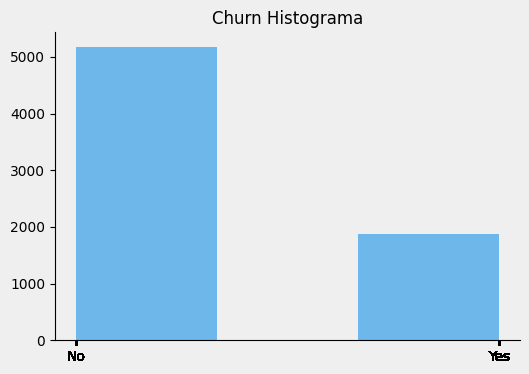


    No Churn: 5,174
    Churn: 1,869 (26.5%)



In [6]:
churn_counts = df['Churn'].value_counts()
x_churn = (churn_counts.iloc[1]/(churn_counts.iloc[1]+churn_counts.iloc[0]))*100

f.plot_histogram('Churn', df)

print(f'''
    No Churn: {churn_counts.iloc[0]:,}
    Churn: {churn_counts.iloc[1]:,} ({x_churn:,.1f}%)
''')

- #### **TIPO DO SERVIÇO**

Analisando os serviços, descobrimos que o churn está concentrado entre os clientes que possuem ambos os serviços (internet e telefonia), com uma taxa de churn de 32,8% nesta categoria. Clientes que possuem apenas o serviço de internet têm uma taxa de churn de 18,1%. E clientes que usam apenas o serviço de telefonia são os mais propensos a continuar com o serviço, apresentando uma taxa de churn de 10,7%.

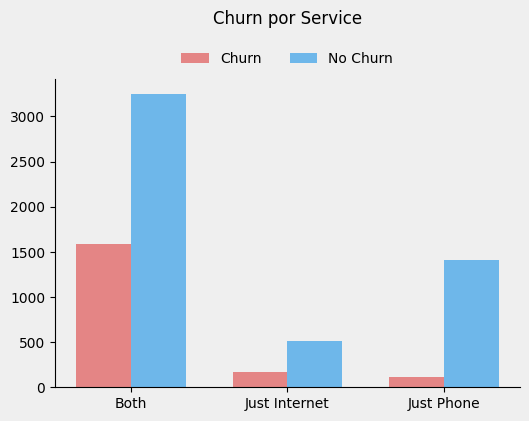


Ambos os Serviços
    No Churn: 3,249
    Churn: 1,586 (32.8%)
Apenas Internet
    No Churn: 512
    Churn: 113 (18.1%)
Apenas Telefone
    No Churn: 1,413
    Churn: 170 (10.7%)



In [7]:
service_counts_no_churn = df[df['Churn'] == 'No']['Service'].value_counts()
service_counts_churn = df[df['Churn'] == 'Yes']['Service'].value_counts()
x_service_both = (service_counts_churn.iloc[0]/(service_counts_no_churn.iloc[0]+service_counts_churn.iloc[0]))*100
x_service_phone = (service_counts_churn.iloc[1]/(service_counts_no_churn.iloc[1]+service_counts_churn.iloc[1]))*100
x_service_internet = (service_counts_churn.iloc[2]/(service_counts_no_churn.iloc[2]+service_counts_churn.iloc[2]))*100

f.plot_bars_2col('Service', df)

print(f'''
Ambos os Serviços
    No Churn: {service_counts_no_churn.iloc[0]:,}
    Churn: {service_counts_churn.iloc[0]:,} ({x_service_both:,.1f}%)
Apenas Internet
    No Churn: {service_counts_no_churn.iloc[2]:,}
    Churn: {service_counts_churn.iloc[2]:,} ({x_service_internet:,.1f}%)
Apenas Telefone
    No Churn: {service_counts_no_churn.iloc[1]:,}
    Churn: {service_counts_churn.iloc[1]:,} ({x_service_phone:,.1f}%)
''')

- #### **SERVIÇO DE TELEFONIA**

Analisando apenas o serviço de telefonia, observamos uma taxa de churn de 24,9% para clientes que não utilizam o serviço e uma taxa de churn de 26,7% para clientes que utilizam o serviço. Note que a diferença é de apenas 1,8 pontos percentuais. Isso nos mostra que a diferença entre ter ou não o serviço de telefonia não tem muita influência na taxa geral de churn.

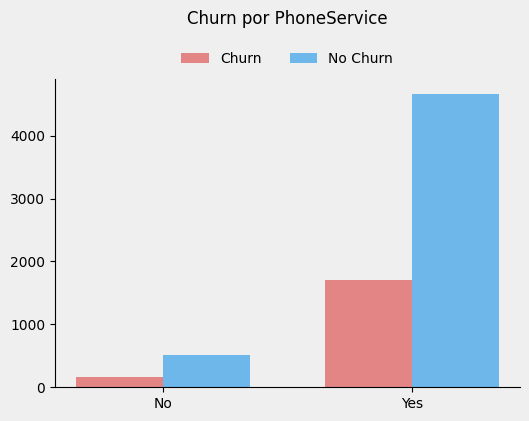


Sem Serviço de Telefonia
    No Churn: 512
    Churn: 170 (24.9%)
Serviço de Telefonia
    No Churn: 4,662
    Churn: 1,699 (26.7%)



In [8]:
phone_counts_no_churn = df[df['Churn'] == 'No']['PhoneService'].value_counts()
phone_counts_churn = df[df['Churn'] == 'Yes']['PhoneService'].value_counts()
x_phone_no = (phone_counts_churn.iloc[1]/(phone_counts_no_churn.iloc[1]+phone_counts_churn.iloc[1]))*100
x_phone_yes = (phone_counts_churn.iloc[0]/(phone_counts_no_churn.iloc[0]+phone_counts_churn.iloc[0]))*100

f.plot_bars_2col('PhoneService', df)

print(f'''
Sem Serviço de Telefonia
    No Churn: {phone_counts_no_churn.iloc[1]:,}
    Churn: {phone_counts_churn.iloc[1]:,} ({x_phone_no:,.1f}%)
Serviço de Telefonia
    No Churn: {phone_counts_no_churn.iloc[0]:,}
    Churn: {phone_counts_churn.iloc[0]:,} ({x_phone_yes:,.1f}%)
''')

- #### **MÚLTIPLAS LINHAS DE TELEFONE**

Similar à análise anterior, temos uma pequena diferença em pontos percentuais. Clientes que não possuem múltiplas linhas telefônicas apresentam uma taxa de churn de 25,1%, enquanto aqueles com múltiplas linhas têm uma taxa de churn de 28,6%, resultando em uma diferença de 3,5 pontos percentuais. Concluímos que este atributo também tem pouca relevância para a taxa geral de churn.

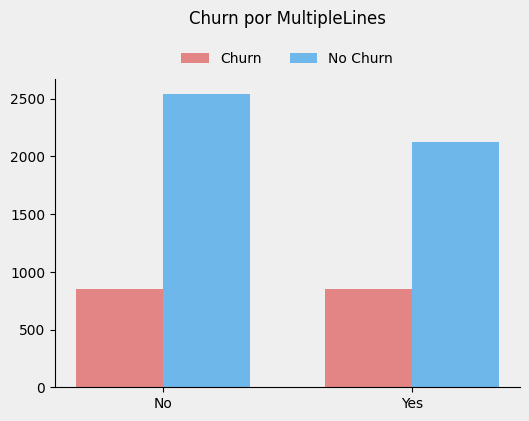


Sem Múltiplas Linhas
    No Churn: 2,541
    Churn: 850 (25.1%)
Múltiplas Linhas
    No Churn: 2,121
    Churn: 849 (28.6%)



In [9]:
lines_counts_no_churn = df[(df['Churn'] == 'No') & (df['MultipleLines'] != 'No phone service')]['MultipleLines'].value_counts()
lines_counts_churn = df[(df['Churn'] == 'Yes') & (df['MultipleLines'] != 'No phone service')]['MultipleLines'].value_counts()
x_lines_no = (lines_counts_churn.iloc[0]/(lines_counts_no_churn.iloc[0]+lines_counts_churn.iloc[0]))*100
x_lines_yes = (lines_counts_churn.iloc[1]/(lines_counts_no_churn.iloc[1]+lines_counts_churn.iloc[1]))*100

f.plot_bars_2col('MultipleLines', df[df['MultipleLines'] != 'No phone service'])

print(f'''
Sem Múltiplas Linhas
    No Churn: {lines_counts_no_churn.iloc[0]:,}
    Churn: {lines_counts_churn.iloc[0]:,} ({x_lines_no:,.1f}%)
Múltiplas Linhas
    No Churn: {lines_counts_no_churn.iloc[1]:,}
    Churn: {lines_counts_churn.iloc[1]:,} ({x_lines_yes:,.1f}%)
''')

- #### **SERVIÇO DE INTERNET**

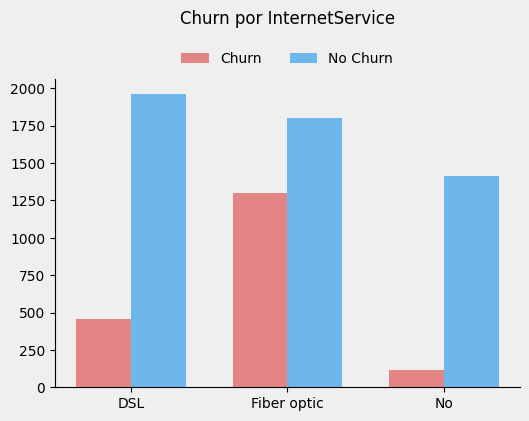


Fiber optic
    No Churn: 1,799
    Churn: 1,297 (41.9%)
DSL
    No Churn: 1,962
    Churn: 459 (19.0%)
--------------------------
Fiber + DSL
    No Churn: 3,761
    Churn: 1,756 (31.8%)   
   
Sem Serviço de Internet
    No Churn: 1,413
    Churn: 113 (7.4%)



In [10]:
internet_counts_no_churn = df[df['Churn'] == 'No']['InternetService'].value_counts()
internet_counts_churn = df[df['Churn'] == 'Yes']['InternetService'].value_counts()
x_internet_fiber = (internet_counts_churn.iloc[0]/(internet_counts_no_churn.iloc[1]+internet_counts_churn.iloc[0]))*100
x_internet_dsl = (internet_counts_churn.iloc[1]/(internet_counts_no_churn.iloc[0]+internet_counts_churn.iloc[1]))*100
x_internet_internet = ((internet_counts_churn.iloc[0]+internet_counts_churn.iloc[1])/((internet_counts_no_churn.iloc[1]+internet_counts_no_churn.iloc[0])+(internet_counts_churn.iloc[0]+internet_counts_churn.iloc[1])))*100
x_internet_no = (internet_counts_churn.iloc[2]/(internet_counts_no_churn.iloc[2]+internet_counts_churn.iloc[2]))*100

f.plot_bars_2col('InternetService', df)

print(f'''
Fiber optic
    No Churn: {internet_counts_no_churn.iloc[1]:,}
    Churn: {internet_counts_churn.iloc[0]:,} ({x_internet_fiber:,.1f}%)
DSL
    No Churn: {internet_counts_no_churn.iloc[0]:,}
    Churn: {internet_counts_churn.iloc[1]:,} ({x_internet_dsl:,.1f}%)
--------------------------
Fiber + DSL
    No Churn: {internet_counts_no_churn.iloc[1]+internet_counts_no_churn.iloc[0]:,}
    Churn: {internet_counts_churn.iloc[0]+internet_counts_churn.iloc[1]:,} ({x_internet_internet:,.1f}%)   
   
Sem Serviço de Internet
    No Churn: {internet_counts_no_churn.iloc[2]:,}
    Churn: {internet_counts_churn.iloc[2]:,} ({x_internet_no:,.1f}%)
''')

Nesta análise, é possível observar que o serviço de internet é o atributo de grande relevância para o resultado do churn. Clientes que não utilizam o serviço de internet têm uma taxa de churn de 7,4%, enquanto aqueles que têm o serviço de internet apresentam uma taxa de 31,8%. Analisando o tipo de tecnologia de serviço de internet, descobrimos que aqueles com fibra óptica são os mais propensos a cancelar o serviço, com uma taxa de churn de 41,9%.

Devido à importância deste atributo, vamos analisar mais detalhadamente os clientes que efetuaram o churn e estavam usando a tecnologia de fibra óptica.

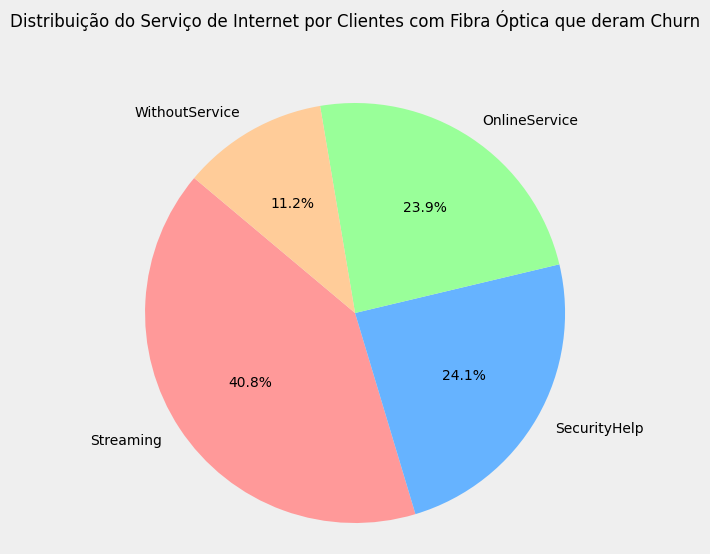


Streaming: 875 (40.8%)
SecurityHelp: 517 (24.1%)
OnlineService: 514 (23.9%)



In [11]:
internet_counts_churn_Streaming = len(df[(df['Churn'] == 'Yes') & (df['InternetService'] == 'Fiber optic') & (df['Streaming'] == 'Yes')].value_counts())
internet_counts_churn_SecurityHelp = len(df[(df['Churn'] == 'Yes') & (df['InternetService'] == 'Fiber optic') & (df['SecurityHelp'] == 'Yes')].value_counts())
internet_counts_churn_OnlineService = len(df[(df['Churn'] == 'Yes') & (df['InternetService'] == 'Fiber optic') & (df['OnlineService'] == 'Yes')].value_counts())
internet_counts_churn_WithoutService = len(df[(df['Churn'] == 'Yes') & (df['InternetService'] == 'Fiber optic') & (df['OnlineService'] != 'Yes') & (df['SecurityHelp'] != 'Yes') & (df['Streaming'] != 'Yes')].value_counts())
total = internet_counts_churn_Streaming + internet_counts_churn_SecurityHelp + internet_counts_churn_OnlineService + internet_counts_churn_WithoutService

labels = ['Streaming', 'SecurityHelp', 'OnlineService', 'WithoutService']
sizes = [internet_counts_churn_Streaming, internet_counts_churn_SecurityHelp, internet_counts_churn_OnlineService, internet_counts_churn_WithoutService]
colors = ['#ff9999','#66b3ff','#99ff99', '#ffcc99']

f.plot_pie(sizes, labels, colors, 'Distribuição do Serviço de Internet por Clientes com Fibra Óptica que deram Churn')

print(f'''
Streaming: {internet_counts_churn_Streaming:,} ({(internet_counts_churn_Streaming/total)*100:,.1f}%)
SecurityHelp: {internet_counts_churn_SecurityHelp:,} ({(internet_counts_churn_SecurityHelp/total)*100:,.1f}%)
OnlineService: {internet_counts_churn_OnlineService:,} ({(internet_counts_churn_OnlineService/total)*100:,.1f}%)
''')

Dos 2.147 clientes que usavam fibra óptica e cancelaram o serviço, 40,8% utilizavam o serviço de Streaming, o que nos leva a hipotetizar que esse fator pode ser o mais relevante para a taxa de churn.

Esta hipótese é confirmada nas análises seguintes, onde aqueles que utilizam o OnlineService e o SecurityHelp são menos propensos a cancelar o serviço.

- #### **OnlineService (OnlineSecurity e OnlineBackup)**

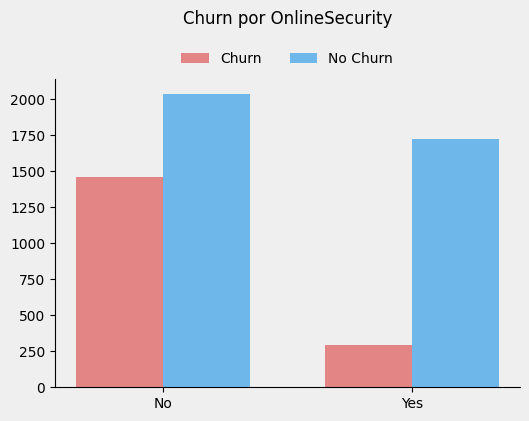


Sem OnlineSecurity
    No Churn: 1,724
    Churn: 1,461 (45.9%)
OnlineSecurity
    No Churn: 2,037
    Churn: 295 (12.7%)



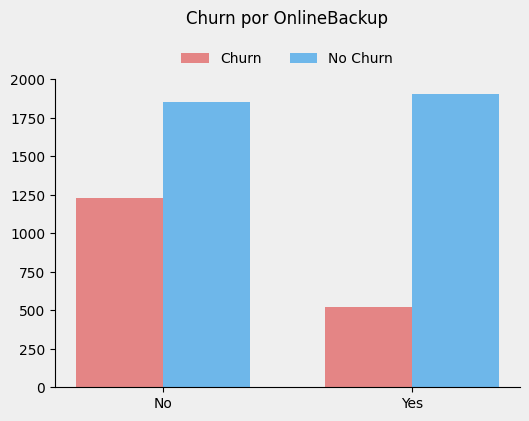


Sem OnlineBackup
    No Churn: 1,855
    Churn: 1,233 (39.9%)
OnlineBackup
    No Churn: 1,906
    Churn: 523 (21.5%)



In [12]:
onlineS_counts_no_churn = df[(df['Churn'] == 'No') & (df['InternetService'] != 'No')]['OnlineSecurity'].value_counts()
onlineS_counts_churn = df[(df['Churn'] == 'Yes') & (df['InternetService'] != 'No')]['OnlineSecurity'].value_counts()
x_onlineS_no = (onlineS_counts_churn.iloc[0]/(onlineS_counts_no_churn.iloc[1]+onlineS_counts_churn.iloc[0]))*100
x_onlineS_yes = (onlineS_counts_churn.iloc[1]/(onlineS_counts_no_churn.iloc[0]+onlineS_counts_churn.iloc[1]))*100

f.plot_bars_2col('OnlineSecurity', df[df['InternetService'] != 'No'])

print(f'''
Sem OnlineSecurity
    No Churn: {onlineS_counts_no_churn.iloc[1]:,}
    Churn: {onlineS_counts_churn.iloc[0]:,} ({x_onlineS_no:,.1f}%)
OnlineSecurity
    No Churn: {onlineS_counts_no_churn.iloc[0]:,}
    Churn: {onlineS_counts_churn.iloc[1]:,} ({x_onlineS_yes:,.1f}%)
''')

onlineB_counts_no_churn = df[(df['Churn'] == 'No') & (df['InternetService'] != 'No')]['OnlineBackup'].value_counts()
onlineB_counts_churn = df[(df['Churn'] == 'Yes') & (df['InternetService'] != 'No')]['OnlineBackup'].value_counts()
x_onlineB_no = (onlineB_counts_churn.iloc[0]/(onlineB_counts_no_churn.iloc[1]+onlineB_counts_churn.iloc[0]))*100
x_onlineB_yes = (onlineB_counts_churn.iloc[1]/(onlineB_counts_no_churn.iloc[0]+onlineB_counts_churn.iloc[1]))*100

f.plot_bars_2col('OnlineBackup', df[df['InternetService'] != 'No'])

print(f'''
Sem OnlineBackup
    No Churn: {onlineB_counts_no_churn.iloc[1]:,}
    Churn: {onlineB_counts_churn.iloc[0]:,} ({x_onlineB_no:,.1f}%)
OnlineBackup
    No Churn: {onlineB_counts_no_churn.iloc[0]:,}
    Churn: {onlineB_counts_churn.iloc[1]:,} ({x_onlineB_yes:,.1f}%)
''')

- #### **SecurityHelp (DeviceProtection e TechSupport)**

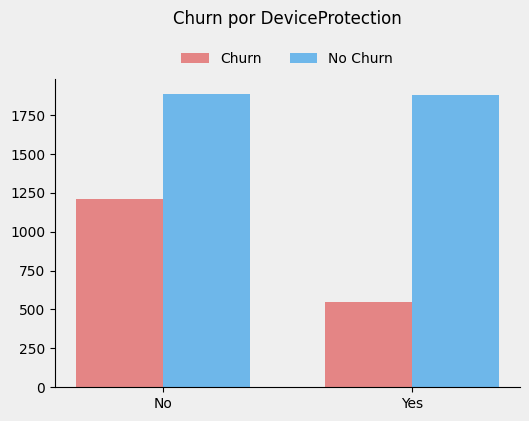


Sem DeviceProtection
    No Churn: 1,884
    Churn: 1,211 (39.1%)
DeviceProtection
    No Churn: 1,877
    Churn: 545 (22.5%)



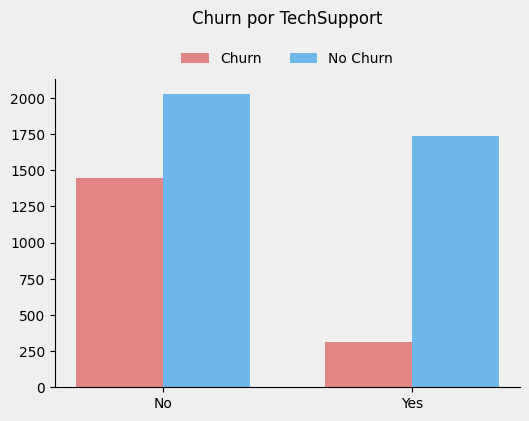


Sem TechSupport
    No Churn: 2,027
    Churn: 1,446 (41.6%)
TechSupport
    No Churn: 1,734
    Churn: 310 (15.2%)



In [13]:
dp_counts_no_churn = df[(df['Churn'] == 'No') & (df['InternetService'] != 'No')]['DeviceProtection'].value_counts()
dp_counts_churn = df[(df['Churn'] == 'Yes') & (df['InternetService'] != 'No')]['DeviceProtection'].value_counts()
x_dp_no = (dp_counts_churn.iloc[0]/(dp_counts_no_churn.iloc[0]+dp_counts_churn.iloc[0]))*100
x_dp_yes = (dp_counts_churn.iloc[1]/(dp_counts_no_churn.iloc[1]+dp_counts_churn.iloc[1]))*100

f.plot_bars_2col('DeviceProtection', df[df['InternetService'] != 'No'])

print(f'''
Sem DeviceProtection
    No Churn: {dp_counts_no_churn.iloc[0]:,}
    Churn: {dp_counts_churn.iloc[0]:,} ({x_dp_no:,.1f}%)
DeviceProtection
    No Churn: {dp_counts_no_churn.iloc[1]:,}
    Churn: {dp_counts_churn.iloc[1]:,} ({x_dp_yes:,.1f}%)
''')

ts_counts_no_churn = df[(df['Churn'] == 'No') & (df['InternetService'] != 'No')]['TechSupport'].value_counts()
ts_counts_churn = df[(df['Churn'] == 'Yes') & (df['InternetService'] != 'No')]['TechSupport'].value_counts()
x_ts_no = (ts_counts_churn.iloc[0]/(ts_counts_no_churn.iloc[0]+ts_counts_churn.iloc[0]))*100
x_ts_yes = (ts_counts_churn.iloc[1]/(ts_counts_no_churn.iloc[1]+ts_counts_churn.iloc[1]))*100

f.plot_bars_2col('TechSupport', df[df['InternetService'] != 'No'])

print(f'''
Sem TechSupport
    No Churn: {ts_counts_no_churn.iloc[0]:,}
    Churn: {ts_counts_churn.iloc[0]:,} ({x_ts_no:,.1f}%)
TechSupport
    No Churn: {ts_counts_no_churn.iloc[1]:,}
    Churn: {ts_counts_churn.iloc[1]:,} ({x_ts_yes:,.1f}%)
''')

- #### **Streaming (StreamingTV e StreamingMovies)**

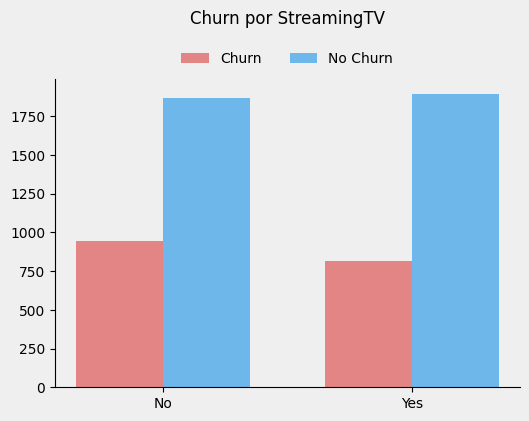


Sem StreamingTV
    No Churn: 1,893
    Churn: 814 (30.1%)
StreamingTV
    No Churn: 1,868
    Churn: 942 (33.5%)



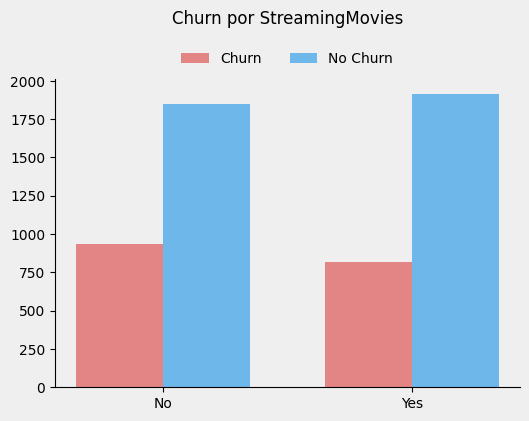


Sem StreamingMovies
    No Churn: 1,914
    Churn: 818 (29.9%)
StreamingMovies
    No Churn: 1,847
    Churn: 938 (33.7%)



In [14]:
strTV_counts_no_churn = df[(df['Churn'] == 'No') & (df['InternetService'] != 'No')]['StreamingTV'].value_counts()
strTV_counts_churn = df[(df['Churn'] == 'Yes') & (df['InternetService'] != 'No')]['StreamingTV'].value_counts()
x_strTV_no = (strTV_counts_churn.iloc[1]/(strTV_counts_no_churn.iloc[0]+strTV_counts_churn.iloc[1]))*100
x_strTV_yes = (strTV_counts_churn.iloc[0]/(strTV_counts_no_churn.iloc[1]+strTV_counts_churn.iloc[0]))*100

f.plot_bars_2col('StreamingTV', df[df['InternetService'] != 'No'])

print(f'''
Sem StreamingTV
    No Churn: {strTV_counts_no_churn.iloc[0]:,}
    Churn: {strTV_counts_churn.iloc[1]:,} ({x_strTV_no:,.1f}%)
StreamingTV
    No Churn: {strTV_counts_no_churn.iloc[1]:,}
    Churn: {strTV_counts_churn.iloc[0]:,} ({x_strTV_yes:,.1f}%)
''')


strM_counts_no_churn = df[(df['Churn'] == 'No') & (df['InternetService'] != 'No')]['StreamingMovies'].value_counts()
strM_counts_churn = df[(df['Churn'] == 'Yes') & (df['InternetService'] != 'No')]['StreamingMovies'].value_counts()
x_strM_no = (strM_counts_churn.iloc[1]/(strM_counts_no_churn.iloc[0]+strM_counts_churn.iloc[1]))*100
x_strM_yes = (strM_counts_churn.iloc[0]/(strM_counts_no_churn.iloc[1]+strM_counts_churn.iloc[0]))*100

f.plot_bars_2col('StreamingMovies', df[df['InternetService'] != 'No'])

print(f'''
Sem StreamingMovies
    No Churn: {strM_counts_no_churn.iloc[0]:,}
    Churn: {strM_counts_churn.iloc[1]:,} ({x_strM_no:,.1f}%)
StreamingMovies
    No Churn: {strM_counts_no_churn.iloc[1]:,}
    Churn: {strM_counts_churn.iloc[0]:,} ({x_strM_yes:,.1f}%)
''')

- #### **NÚMERO DE SERVIÇOS DE INTERNET**

Conforme o dataset inicial, há seis tipos de serviços de internet. Isso levou à uma pergunta: Há alguma diferença na taxa de churn com base na quantidade de serviços que um cliente tem no contrato? Com base na aánlise, descobrimos que a quantidade de serviço é inversamente proporcional à taxa de churn. Ou seja, quanto menos serviços de internet o cliente assinada, maior é a probabilidade de cancelar o contrato.

00 Serviço: **52,2% de churn.**

01 Serviço: **45,8% de churn.**

02 Serviços: **35,8% de churn.**

03 Serviços: **27,4% de churn.**

04 Serviços: **22,3% de churn.**

05 Serviços: **12,4% de churn.**

06 Serviços: **5,3% de churn.**

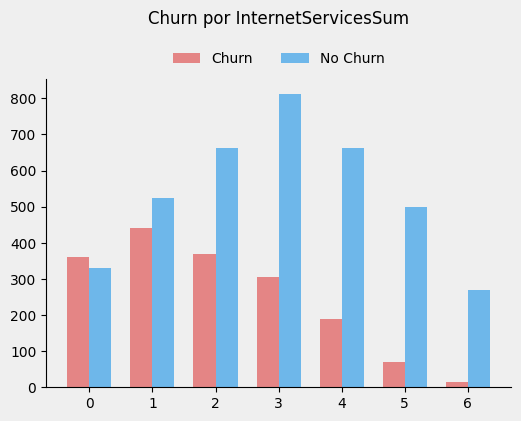


0 Serviço
    No Churn: 331
    Churn: 362 (52.2%)
1 Serviço
    No Churn: 524
    Churn: 442 (45.8%)
2 Serviços
    No Churn: 663
    Churn: 370 (35.8%)
3 Serviços
    No Churn: 812
    Churn: 306 (27.4%)
4 Serviços
    No Churn: 662
    Churn: 190 (22.3%)
5 Serviços
    No Churn: 500
    Churn: 71 (12.4%)
6 Serviços
    No Churn: 269
    Churn: 15 (5.3%)



In [15]:
iss_counts_no_churn = df[(df['Churn'] == 'No') & (df['InternetService'] != 'No')]['InternetServicesSum'].value_counts()
iss_counts_churn = df[(df['Churn'] == 'Yes') & (df['InternetService'] != 'No')]['InternetServicesSum'].value_counts()
x_iss_0 = (iss_counts_churn.iloc[2]/(iss_counts_no_churn.iloc[5]+iss_counts_churn.iloc[2]))*100
x_iss_1 = (iss_counts_churn.iloc[0]/(iss_counts_no_churn.iloc[3]+iss_counts_churn.iloc[0]))*100
x_iss_2 = (iss_counts_churn.iloc[1]/(iss_counts_no_churn.iloc[1]+iss_counts_churn.iloc[1]))*100
x_iss_3 = (iss_counts_churn.iloc[3]/(iss_counts_no_churn.iloc[0]+iss_counts_churn.iloc[3]))*100
x_iss_4 = (iss_counts_churn.iloc[4]/(iss_counts_no_churn.iloc[2]+iss_counts_churn.iloc[4]))*100
x_iss_5 = (iss_counts_churn.iloc[5]/(iss_counts_no_churn.iloc[4]+iss_counts_churn.iloc[5]))*100
x_iss_6 = (iss_counts_churn.iloc[6]/(iss_counts_no_churn.iloc[6]+iss_counts_churn.iloc[6]))*100

f.plot_bars_2col('InternetServicesSum', df[df['InternetService'] != 'No'])

print(f'''
0 Serviço
    No Churn: {iss_counts_no_churn.iloc[5]:,}
    Churn: {iss_counts_churn.iloc[2]:,} ({x_iss_0:,.1f}%)
1 Serviço
    No Churn: {iss_counts_no_churn.iloc[3]:,}
    Churn: {iss_counts_churn.iloc[0]:,} ({x_iss_1:,.1f}%)
2 Serviços
    No Churn: {iss_counts_no_churn.iloc[1]:,}
    Churn: {iss_counts_churn.iloc[1]:,} ({x_iss_2:,.1f}%)
3 Serviços
    No Churn: {iss_counts_no_churn.iloc[0]:,}
    Churn: {iss_counts_churn.iloc[3]:,} ({x_iss_3:,.1f}%)
4 Serviços
    No Churn: {iss_counts_no_churn.iloc[2]:,}
    Churn: {iss_counts_churn.iloc[4]:,} ({x_iss_4:,.1f}%)
5 Serviços
    No Churn: {iss_counts_no_churn.iloc[4]:,}
    Churn: {iss_counts_churn.iloc[5]:,} ({x_iss_5:,.1f}%)
6 Serviços
    No Churn: {iss_counts_no_churn.iloc[6]:,}
    Churn: {iss_counts_churn.iloc[6]:,} ({x_iss_6:,.1f}%)
''')

- #### **GÊNERO**

Constatamos que a diferença de apenas 0,4 ponto percentual entre os gêneros confirma que esse atributo não influencia a taxa de churn.

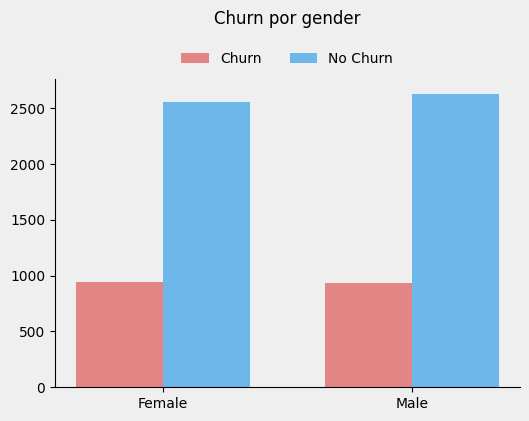


Female
    No Churn: 2,625
    Churn: 939 (26.3%)
Male
    No Churn: 2,549
    Churn: 930 (26.7%)



In [16]:
gender_counts_no_churn = df[df['Churn'] == 'No']['gender'].value_counts()
gender_counts_churn = df[df['Churn'] == 'Yes']['gender'].value_counts()
x_gender_female = (gender_counts_churn.iloc[0]/(gender_counts_no_churn.iloc[0]+gender_counts_churn.iloc[0]))*100
x_gender_male = (gender_counts_churn.iloc[1]/(gender_counts_no_churn.iloc[1]+gender_counts_churn.iloc[1]))*100

f.plot_bars_2col('gender', df)

print(f'''
Female
    No Churn: {gender_counts_no_churn.iloc[0]:,}
    Churn: {gender_counts_churn.iloc[0]:,} ({x_gender_female:,.1f}%)
Male
    No Churn: {gender_counts_no_churn.iloc[1]:,}
    Churn: {gender_counts_churn.iloc[1]:,} ({x_gender_male:,.1f}%)
''')

- #### **CIDADÃO IDOSO**

Vemos que esse é um atributo relevante, embora o número de idosos seja menor, a taxa de rotatividade é de 41,7%.

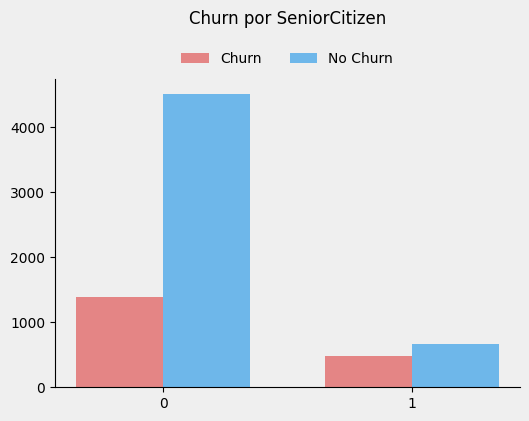


Não é Idoso
    No Churn: 4,508
    Churn: 1,393 (23.6%)
Idoso
    No Churn: 666
    Churn: 476 (41.7%)



In [17]:
seniorcit_counts_no_churn = df[df['Churn'] == 'No']['SeniorCitizen'].value_counts()
seniorcit_counts_churn = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()
x_seniorcit_no = (seniorcit_counts_churn.iloc[0]/(seniorcit_counts_no_churn.iloc[0]+seniorcit_counts_churn.iloc[0]))*100
x_seniorcit_yes = (seniorcit_counts_churn.iloc[1]/(seniorcit_counts_no_churn.iloc[1]+seniorcit_counts_churn.iloc[1]))*100

f.plot_bars_2col('SeniorCitizen', df)

print(f'''
Não é Idoso
    No Churn: {seniorcit_counts_no_churn.iloc[0]:,}
    Churn: {seniorcit_counts_churn.iloc[0]:,} ({x_seniorcit_no:,.1f}%)
Idoso
    No Churn: {seniorcit_counts_no_churn.iloc[1]:,}
    Churn: {seniorcit_counts_churn.iloc[1]:,} ({x_seniorcit_yes:,.1f}%)
''')

- #### **O CLIENTE TER UM PARCEIRO**

Ter ou não um parceiro demonstra haver uma leve influência sobre a taxa de churn. Isso fica evidente quando calculmaos uma taxa de churn de 19,7% para quem têm parceiro e de 33,0% para os clientes que não têm parceiro.

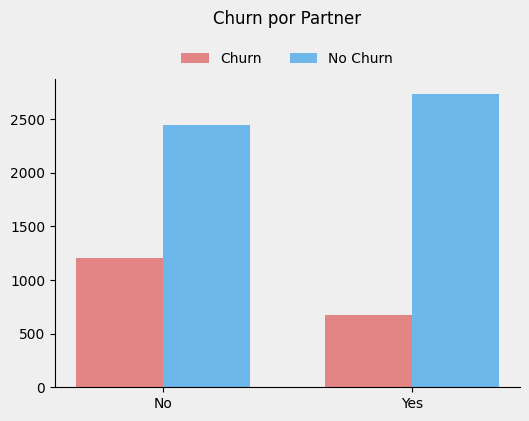


Não tem parceiro
    No Churn: 2,441
    Churn: 1,200 (33.0%)
Tem parceiro
    No Churn: 2,733
    Churn: 669 (19.7%)



In [18]:
partner_counts_no_churn = df[df['Churn'] == 'No']['Partner'].value_counts()
partner_counts_churn = df[df['Churn'] == 'Yes']['Partner'].value_counts()
x_partner_no = (partner_counts_churn.iloc[0]/(partner_counts_no_churn.iloc[1]+partner_counts_churn.iloc[0]))*100
x_partner_yes = (partner_counts_churn.iloc[1]/(partner_counts_no_churn.iloc[0]+partner_counts_churn.iloc[1]))*100

f.plot_bars_2col('Partner', df)

print(f'''
Não tem parceiro
    No Churn: {partner_counts_no_churn.iloc[1]:,}
    Churn: {partner_counts_churn.iloc[0]:,} ({x_partner_no:,.1f}%)
Tem parceiro
    No Churn: {partner_counts_no_churn.iloc[0]:,}
    Churn: {partner_counts_churn.iloc[1]:,} ({x_partner_yes:,.1f}%)
''')

- #### **DEPENDENTES**

Nesse atributo, é possível observar que a taxa de churn para aqueles que não têm dependentes é quase o dobro da taxa dos clientes que têm dependentes (Dependentes: 15,5% de taxa de churn; Sem dependentes: 31,3% de taxa de churn). Analisamos que aqueles sem dependentes dependem apenas de si mesmos para tomar a decisão de cancelar o serviço, enquanto aqueles com dependentes podem precisar considerar o uso dos serviços por outras pessoas.

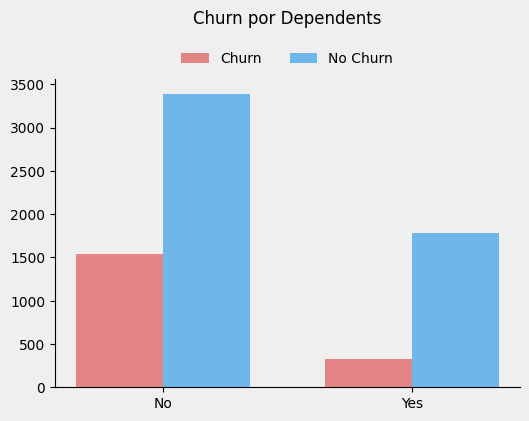


Sem Dependentes
    No Churn: 3,390
    Churn: 1,543 (31.3%)
Com Dependentes
    No Churn: 1,784
    Churn: 326 (15.5%)



In [19]:
dependents_counts_no_churn = df[df['Churn'] == 'No']['Dependents'].value_counts()
dependents_counts_churn = df[df['Churn'] == 'Yes']['Dependents'].value_counts()
x_dependents_no = (dependents_counts_churn.iloc[0]/(dependents_counts_no_churn.iloc[0]+dependents_counts_churn.iloc[0]))*100
x_dependents_yes = (dependents_counts_churn.iloc[1]/(dependents_counts_no_churn.iloc[1]+dependents_counts_churn.iloc[1]))*100

f.plot_bars_2col('Dependents', df)

print(f'''
Sem Dependentes
    No Churn: {dependents_counts_no_churn.iloc[0]:,}
    Churn: {dependents_counts_churn.iloc[0]:,} ({x_dependents_no:,.1f}%)
Com Dependentes
    No Churn: {dependents_counts_no_churn.iloc[1]:,}
    Churn: {dependents_counts_churn.iloc[1]:,} ({x_dependents_yes:,.1f}%)
''')

- #### **TIPO DE CONTRATO**

Esse atributo considera o tipo de contrato (se é uma renovação é mensal ou um contrato com um compromisso de 1 ou 2 anos). Notoriamente, as pessoas com um contrato mensal têm uma tendência maior de cancelar o serviço (42,7% de taxa de churn), e as pessoas com um contrato de compromisso bienal (2,8% de taxa de churn) têm maior probabilidade de renovar o contrato em comparação com as pessoas com um contrato de compromisso anual (11,3% de taxa de churn).

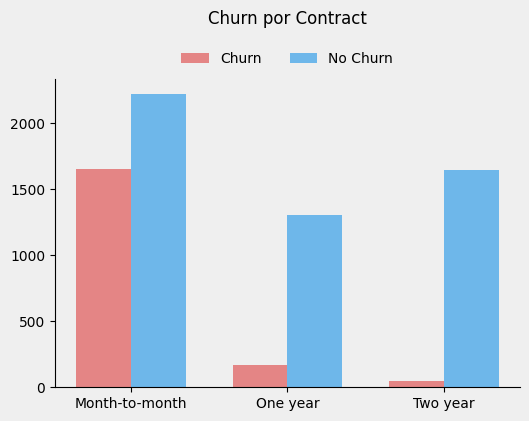


Contrato Mensal
    No Churn: 2,220
    Churn: 1,655 (42.7%)
Contrato Anual
    No Churn: 1,307
    Churn: 166 (11.3%)
Contratro Bienal
    No Churn: 1,647
    Churn: 48 (2.8%)



In [20]:
contract_counts_no_churn = df[df['Churn'] == 'No']['Contract'].value_counts()
contract_counts_churn = df[df['Churn'] == 'Yes']['Contract'].value_counts()
x_contract_monthly = (contract_counts_churn.iloc[0]/(contract_counts_no_churn.iloc[0]+contract_counts_churn.iloc[0]))*100
x_contract_one = (contract_counts_churn.iloc[1]/(contract_counts_no_churn.iloc[2]+contract_counts_churn.iloc[1]))*100
x_contract_two = (contract_counts_churn.iloc[2]/(contract_counts_no_churn.iloc[1]+contract_counts_churn.iloc[2]))*100

f.plot_bars_2col('Contract', df)

print(f'''
Contrato Mensal
    No Churn: {contract_counts_no_churn.iloc[0]:,}
    Churn: {contract_counts_churn.iloc[0]:,} ({x_contract_monthly:,.1f}%)
Contrato Anual
    No Churn: {contract_counts_no_churn.iloc[2]:,}
    Churn: {contract_counts_churn.iloc[1]:,} ({x_contract_one:,.1f}%)
Contratro Bienal
    No Churn: {contract_counts_no_churn.iloc[1]:,}
    Churn: {contract_counts_churn.iloc[2]:,} ({x_contract_two:,.1f}%)
''')

- #### **FATURA DIGITAL**

Observa-se que os clientes que optam pelo faturamento digital (33,6% de taxa de churn) têm maior probabilidade de cancelar o serviço (quase o dobro da taxa de churn) em comparação com os que optam pelo faturamento impresso (16,3% de taxa de churn). E, como pode ser visto na análise abaixo, há uma correlação de 0,21 entre a opção pelo faturamento digital e o uso do método de pagamento Electronic Check.

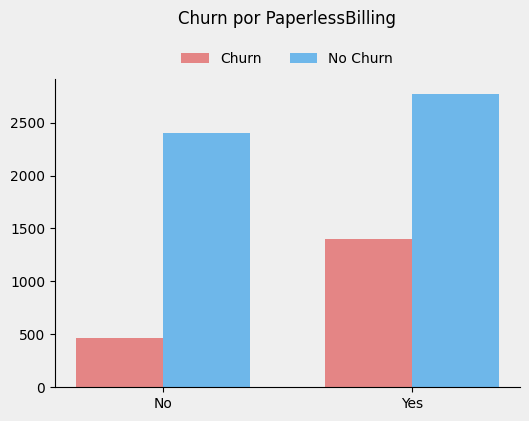


Sem Fatura Digital
    No Churn: 2,403
    Churn: 469 (16.3%)
Fatura Digital
    No Churn: 2,771
    Churn: 1,400 (33.6%)



In [21]:
paper_counts_no_churn = df[df['Churn'] == 'No']['PaperlessBilling'].value_counts()
paper_counts_churn = df[df['Churn'] == 'Yes']['PaperlessBilling'].value_counts()
x_paper_yes = (paper_counts_churn.iloc[0]/(paper_counts_no_churn.iloc[0]+paper_counts_churn.iloc[0]))*100
x_paper_no = (paper_counts_churn.iloc[1]/(paper_counts_no_churn.iloc[1]+paper_counts_churn.iloc[1]))*100

f.plot_bars_2col('PaperlessBilling', df)

print(f'''
Sem Fatura Digital
    No Churn: {paper_counts_no_churn.iloc[1]:,}
    Churn: {paper_counts_churn.iloc[1]:,} ({x_paper_no:,.1f}%)
Fatura Digital
    No Churn: {paper_counts_no_churn.iloc[0]:,}
    Churn: {paper_counts_churn.iloc[0]:,} ({x_paper_yes:,.1f}%)
''')

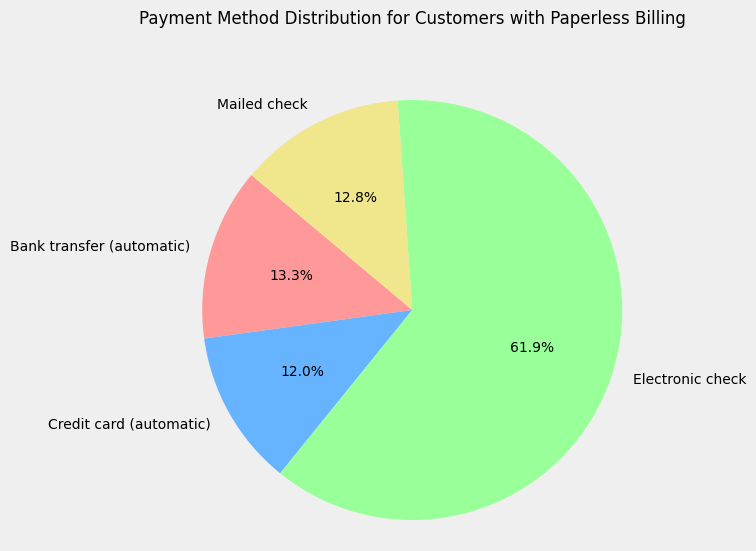


Bank transfer (automatic): 186 (13.3%)
Credit card (automatic): 168 (12.0%)
Electronic check: 867 (61.9%)
Mailed check: 179 (12.8%)



In [22]:
pb_counts_churn_bank = len(df[(df['Churn'] == 'Yes') & (df['PaperlessBilling'] == 'Yes') & (df['PaymentMethod'] == 'Bank transfer (automatic)')].value_counts())
pb_counts_churn_credit = len(df[(df['Churn'] == 'Yes') & (df['PaperlessBilling'] == 'Yes') & (df['PaymentMethod'] == 'Credit card (automatic)')].value_counts())
pb_counts_churn_elect = len(df[(df['Churn'] == 'Yes') & (df['PaperlessBilling'] == 'Yes') & (df['PaymentMethod'] == 'Electronic check')].value_counts())
pb_counts_churn_mailed = len(df[(df['Churn'] == 'Yes') & (df['PaperlessBilling'] == 'Yes') & (df['PaymentMethod'] == 'Mailed check')].value_counts())
total = pb_counts_churn_bank + pb_counts_churn_credit + pb_counts_churn_elect + pb_counts_churn_mailed

labels = ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
sizes = [pb_counts_churn_bank, pb_counts_churn_credit, pb_counts_churn_elect, pb_counts_churn_mailed]
colors = ['#ff9999','#66b3ff','#99ff99', '#f0e68c']
explode = (0, 0, 0)  # explode the 1st slice

f.plot_pie(sizes, labels, colors, 'Payment Method Distribution for Customers with Paperless Billing')

print(f'''
Bank transfer (automatic): {pb_counts_churn_bank:,} ({(pb_counts_churn_bank/total)*100:,.1f}%)
Credit card (automatic): {pb_counts_churn_credit:,} ({(pb_counts_churn_credit/total)*100:,.1f}%)
Electronic check: {pb_counts_churn_elect:,} ({(pb_counts_churn_elect/total)*100:,.1f}%)
Mailed check: {pb_counts_churn_mailed:,} ({(pb_counts_churn_mailed/total)*100:,.1f}%)
''')

In [23]:
df['IsElectronicCheck'] = df['PaymentMethod'] == 'Electronic check'
correlation_paperless_electronic = df['PaperlessBilling'].map({'Yes': 1, 'No': 0}).corr(df['IsElectronicCheck'].map({True: 1, False: 0}))
print(f'Correlação entre PaperlessBilling e Electronic check: {correlation_paperless_electronic:.2f}')

Correlação entre PaperlessBilling e Electronic check: 0.21


- #### **MÉTODO DE PAGAMENTO**

Como pode ser observado, a proximidade em pontos percentuais entre transferência bancária e cartão de crédito mostra que não há diferença entre os dois métodos com relação à taxa de churn. Ambos os métodos de pagamento têm o mesmo “comportamento” com relação ao churn. Ao analisar o atributo, dividimos os métodos em Automatic Methods (taxa de churn de 16,0%), Electronic check (taxa de churn de 45,3%) e Mailed check (taxa de churn de 19,1%).
Notoriamente, os clientes que usam o método de pagamento Electronic check são os mais propensos a cancelar o serviço, conforme observado na análise anterior dos clientes que cancelaram e optaram pela fatura digital.

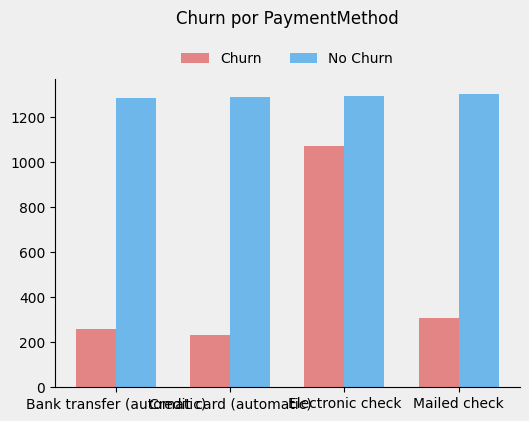


Bank transfer (automatic)
    No Churn: 1,286
    Churn: 258 (16.7%)
Credit card (automatic)
    No Churn: 1,290
    Churn: 232 (15.2%)
--------------------------
Automatic Methods
    No Churn: 2,576
    Churn: 490 (16.0%)
--------------------------
Electronic check
    No Churn: 1,294
    Churn: 1,071 (45.3%)
Mailed check
    No Churn: 1,304
    Churn: 308 (19.1%)



In [24]:
pay_counts_no_churn = df[df['Churn'] == 'No']['PaymentMethod'].value_counts()
pay_counts_churn = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()
x_pay_elec = (pay_counts_churn.iloc[0]/(pay_counts_no_churn.iloc[1]+pay_counts_churn.iloc[0]))*100
x_pay_mail = (pay_counts_churn.iloc[1]/(pay_counts_no_churn.iloc[0]+pay_counts_churn.iloc[1]))*100
x_pay_bank = (pay_counts_churn.iloc[2]/(pay_counts_no_churn.iloc[3]+pay_counts_churn.iloc[2]))*100
x_pay_card = (pay_counts_churn.iloc[3]/(pay_counts_no_churn.iloc[2]+pay_counts_churn.iloc[3]))*100
x_pay_automatic = ((pay_counts_churn.iloc[2]+pay_counts_churn.iloc[3])/((pay_counts_no_churn.iloc[2]+pay_counts_no_churn.iloc[3])+(pay_counts_churn.iloc[2]+pay_counts_churn.iloc[3])))*100

f.plot_bars_2col('PaymentMethod', df)

print(f'''
Bank transfer (automatic)
    No Churn: {pay_counts_no_churn.iloc[3]:,}
    Churn: {pay_counts_churn.iloc[2]:,} ({x_pay_bank:,.1f}%)
Credit card (automatic)
    No Churn: {pay_counts_no_churn.iloc[2]:,}
    Churn: {pay_counts_churn.iloc[3]:,} ({x_pay_card:,.1f}%)
--------------------------
Automatic Methods
    No Churn: {pay_counts_no_churn.iloc[2] + pay_counts_no_churn.iloc[3]:,}
    Churn: {pay_counts_churn.iloc[2] + pay_counts_churn.iloc[3]:,} ({(x_pay_automatic):,.1f}%)
--------------------------
Electronic check
    No Churn: {pay_counts_no_churn.iloc[1]:,}
    Churn: {pay_counts_churn.iloc[0]:,} ({x_pay_elec:,.1f}%)
Mailed check
    No Churn: {pay_counts_no_churn.iloc[0]:,}
    Churn: {pay_counts_churn.iloc[1]:,} ({x_pay_mail:,.1f}%)
''')

- #### **VALOR DE CONTRATO MENSAL**

Na análise de dados, a categorização de atributos é uma técnica valiosa para simplificar a interpretação e a visualização de grandes conjuntos de dados. Dois métodos estatísticos usados com frequência para essa finalidade são a mediana e o desvio padrão. Ambos oferecem uma maneira eficaz de resumir e segmentar dados, permitindo uma análise mais precisa e insights mais claros.

**Mediana**<br>
A mediana é o valor que separa a metade superior da metade inferior de um conjunto de dados. Ela é particularmente útil em distribuições distorcidas, em que a média pode ser distorcida por valores extremos. Ao usar a mediana.

**Desvio padrão**<br>
O desvio padrão é uma medida de dispersão que indica o quanto os dados variam em torno da média. Ele é fundamental para entender a variabilidade em um conjunto de dados.

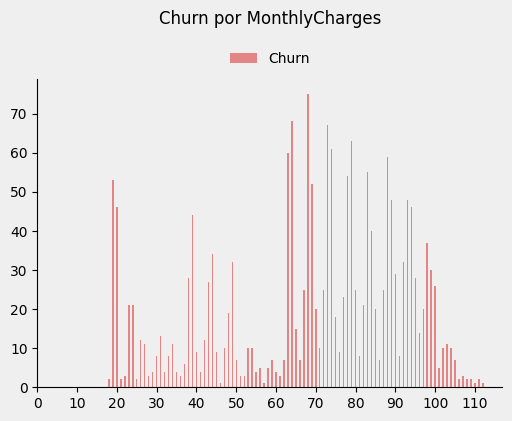


Minimum: 18.25
Mean: 64.76
Median: 70.35
Standard Deviation: 30.09
Maximum: 118.75



In [25]:
min_churn = df['MonthlyCharges'].min()
mean_churn = df['MonthlyCharges'].mean()
median_churn = df['MonthlyCharges'].median()
std_dev_churn = df['MonthlyCharges'].std()
max_churn = df['MonthlyCharges'].max()

f.plot_bars_1col('MonthlyCharges', df)

print(f'''
Minimum: {min_churn:.2f}
Mean: {mean_churn:.2f}
Median: {median_churn:.2f}
Standard Deviation: {std_dev_churn:.2f}
Maximum: {max_churn:.2f}
''')

O uso da mediana e do desvio padrão para criar categorias em um atributo enriquece a análise de dados, proporcionando uma compreensão mais clara e detalhada dos padrões e tendências subjacentes. Essa abordagem não apenas aumenta a precisão analítica, mas também apoia uma tomada de decisão mais eficaz e informada.
Nesta análise, considerando a mediana de 70,35 e o desvio padrão de 30,09, criamos as seguintes categorias: 0-40 (valores abaixo de 40), 40-70, 70-100, 100+ (valores acima de 100).

In [26]:
df['MonthlyChargesClass'] = pd.cut(df['MonthlyCharges'], bins=[-float('inf'), 40, 70, 100, float('inf')], labels=['0-40', '40-70', '70-100', '100+'])

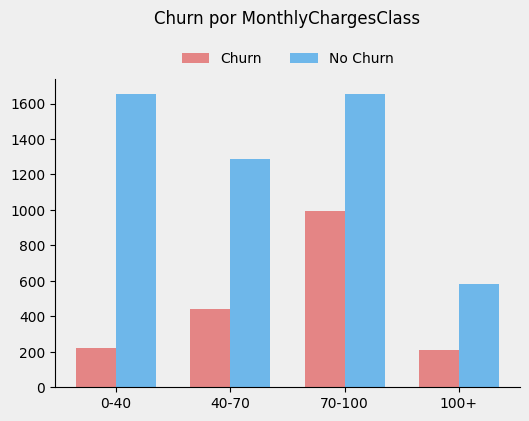


0-40
    No Churn: 1,651
    Churn: 211 (11.3%)
40-70
    No Churn: 580
    Churn: 224 (27.9%)
70-100
    No Churn: 1,654
    Churn: 995 (37.6%)
100+
    No Churn: 1,289
    Churn: 439 (25.4%)



In [27]:
mcClass_counts_no_churn = df[df['Churn'] == 'No']['MonthlyChargesClass'].value_counts()
mcClass_counts_churn = df[df['Churn'] == 'Yes']['MonthlyChargesClass'].value_counts()
mcClass_counts_no_churn, mcClass_counts_churn
x_mcClass_040 = (mcClass_counts_churn.iloc[3]/(mcClass_counts_no_churn.iloc[1]+mcClass_counts_churn.iloc[3]))*100
x_mcClass_4070 = (mcClass_counts_churn.iloc[2]/(mcClass_counts_no_churn.iloc[3]+mcClass_counts_churn.iloc[2]))*100
x_mcClass_70100 = (mcClass_counts_churn.iloc[0]/(mcClass_counts_no_churn.iloc[0]+mcClass_counts_churn.iloc[0]))*100
x_mcClass_100 = (mcClass_counts_churn.iloc[1]/(mcClass_counts_no_churn.iloc[2]+mcClass_counts_churn.iloc[1]))*100

f.plot_bars_2col('MonthlyChargesClass', df)

print(f'''
0-40
    No Churn: {mcClass_counts_no_churn.iloc[1]:,}
    Churn: {mcClass_counts_churn.iloc[3]:,} ({x_mcClass_040:,.1f}%)
40-70
    No Churn: {mcClass_counts_no_churn.iloc[3]:,}
    Churn: {mcClass_counts_churn.iloc[2]:,} ({x_mcClass_4070:,.1f}%)
70-100
    No Churn: {mcClass_counts_no_churn.iloc[0]:,}
    Churn: {mcClass_counts_churn.iloc[0]:,} ({x_mcClass_70100:,.1f}%)
100+
    No Churn: {mcClass_counts_no_churn.iloc[2]:,}
    Churn: {mcClass_counts_churn.iloc[1]:,} ({x_mcClass_100:,.1f}%)
''')

Simplificando a visualização da análise, observamos que as pessoas com cobranças mensais entre 70 e 100 têm maior probabilidade de cancelar o serviço, com uma taxa de rotatividade de 37,6%.

- #### **TEMPO DE CONTRATO**

Esse atributo é inversamente proporcional à taxa de churn (correlação de -0,3522). Em outras palavras, quanto maior a duração do contrato de um cliente, maior a possibilidade de manter sua fidelidade, o que reduz a taxa de churn.

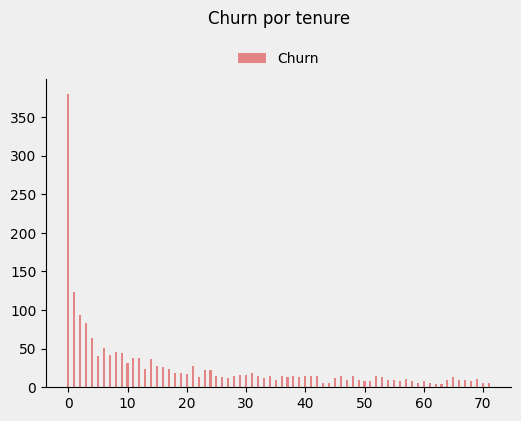

Correlação: -0.3522


In [28]:
f.plot_bars_1col('tenure', df)

df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
correlation = df['Churn_numeric'].corr(df['tenure'])
print(f'Correlação: {correlation:.4f}')


Minimum: 0.00
Mean: 32.37
Median: 29.00
Standard Deviation: 24.56
Maximum: 72.00



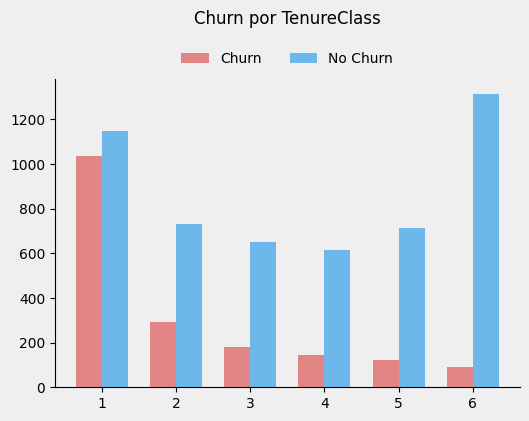


1 ano
    No Churn: 1,149
    Churn: 1,037 (47.4%)
2 anos
    No Churn: 730
    Churn: 294 (28.7%)
3 anos
    No Churn: 652
    Churn: 180 (21.6%)
4 anos
    No Churn: 617
    Churn: 145 (19.0%)
5 anos
    No Churn: 712
    Churn: 120 (14.4%)
6 anos
    No Churn: 1,314
    Churn: 93 (6.6%)



In [29]:
min_churn = df['tenure'].min()
mean_churn = df['tenure'].mean()
median_churn = df['tenure'].median()
std_dev_churn = df['tenure'].std()
max_churn = df['tenure'].max()

print(f'''
Minimum: {min_churn:.2f}
Mean: {mean_churn:.2f}
Median: {median_churn:.2f}
Standard Deviation: {std_dev_churn:.2f}
Maximum: {max_churn:.2f}
''')

df['TenureClass'] = pd.cut(df['tenure'], bins=[-float('inf'), 12, 24, 36, 48, 60, 72], labels=['1', '2', '3', '4', '5', '6'])

f.plot_bars_2col('TenureClass', df)

t_counts_no_churn = df[df['Churn'] == 'No']['TenureClass'].value_counts()
t_counts_churn = df[df['Churn'] == 'Yes']['TenureClass'].value_counts()
t_counts_no_churn, mcClass_counts_churn
x_t_1= (t_counts_churn.iloc[0]/(t_counts_no_churn.iloc[1]+t_counts_churn.iloc[0]))*100
x_t_2 = (t_counts_churn.iloc[1]/(t_counts_no_churn.iloc[2]+t_counts_churn.iloc[1]))*100
x_t_3 = (t_counts_churn.iloc[2]/(t_counts_no_churn.iloc[4]+t_counts_churn.iloc[2]))*100
x_t_4 = (t_counts_churn.iloc[3]/(t_counts_no_churn.iloc[5]+t_counts_churn.iloc[3]))*100
x_t_5 = (t_counts_churn.iloc[4]/(t_counts_no_churn.iloc[3]+t_counts_churn.iloc[4]))*100
x_t_6 = (t_counts_churn.iloc[5]/(t_counts_no_churn.iloc[0]+t_counts_churn.iloc[5]))*100

print(f'''
1 ano
    No Churn: {t_counts_no_churn.iloc[1]:,}
    Churn: {t_counts_churn.iloc[0]:,} ({x_t_1:,.1f}%)
2 anos
    No Churn: {t_counts_no_churn.iloc[2]:,}
    Churn: {t_counts_churn.iloc[1]:,} ({x_t_2:,.1f}%)
3 anos
    No Churn: {t_counts_no_churn.iloc[4]:,}
    Churn: {t_counts_churn.iloc[2]:,} ({x_t_3:,.1f}%)
4 anos
    No Churn: {t_counts_no_churn.iloc[5]:,}
    Churn: {t_counts_churn.iloc[3]:,} ({x_t_4:,.1f}%)
5 anos
    No Churn: {t_counts_no_churn.iloc[3]:,}
    Churn: {t_counts_churn.iloc[4]:,} ({x_t_5:,.1f}%)
6 anos
    No Churn: {t_counts_no_churn.iloc[0]:,}
    Churn: {t_counts_churn.iloc[5]:,} ({x_t_6:,.1f}%)
''')


- #### **VALOR TOTAL PAGO**

Esse atributo é uma medida resultante da cobrança mensal, multiplicada pelo número de meses do tempo de contrato. Por se tratar de um atributo cujo "comportamento" já foi analisado nos dois últimos, optou-se por não realizar uma análise exploratória.

---

# Conclusão

Os insights obtidos a partir da análise exploratória de dados são fundamentais para a construção de um modelo de machine learning eficaz. A seguir, destacamos os principais pontos que devem ser considerados:

- **Taxa de Churn Geral**: A taxa de churn de 26,5% indica que aproximadamente um quarto dos clientes cancelam o serviço. Este é um ponto de partida crucial para o modelo, pois define a base do comportamento de churn.

- **Tipo de Serviço**: Clientes que possuem ambos os serviços (internet e telefone) apresentam uma taxa de churn mais alta (32,8%). Este insight sugere que a combinação de serviços pode ser um fator importante a ser considerado no modelo.

- **Serviço de Internet**: Clientes de fibra óptica têm a maior taxa de churn (41,9%), enquanto aqueles sem serviço de internet têm a menor taxa (7,4%). A tecnologia de serviço de internet é um atributo significativo que deve ser incluído no modelo.

- **Serviços de Streaming**: Clientes que utilizam serviços de streaming têm uma taxa de churn mais alta (30,3%). Este comportamento indica que a satisfação com serviços de streaming pode influenciar a decisão de churn.

- **Número de Serviços de Internet**: A quantidade de serviços de internet é inversamente proporcional à taxa de churn. Clientes com nenhum serviço têm a maior taxa de churn (52,2%), enquanto aqueles com seis serviços têm a menor taxa (5,3%). Este padrão deve ser capturado pelo modelo.

- **Idade do Cliente**: Clientes idosos têm uma taxa de churn mais alta (41,7%) em comparação com não-idosos (23,6%). A idade do cliente é um fator relevante que deve ser considerado.

- **Status de Parceria e Dependentes**: Clientes com parceiros têm uma taxa de churn menor (19,7%), enquanto aqueles sem dependentes têm uma taxa de churn mais alta (31,3%). Esses atributos sociais podem influenciar a decisão de churn.

- **Tipo de Contrato**: Clientes com contratos mensais têm a maior taxa de churn (42,7%), enquanto aqueles com contratos de 24 meses têm a menor taxa (2,8%). A duração do contrato é um fator crítico para o modelo.

- **Fatura Digital e Método de Pagamento**: Clientes que optam por faturamento digital têm uma taxa de churn mais alta (33,6%), especialmente aqueles que usam cheques eletrônicos (45,3%). A escolha do método de pagamento e faturamento deve ser incluída no modelo.

- **Cobranças Mensais**: Clientes com cobranças mensais entre 70-100 têm a maior taxa de churn (37,6%). O valor da cobrança mensal é um indicador importante do comportamento de churn.

- **Duração do Contrato**: Há uma correlação negativa entre a duração do contrato e a taxa de churn (-0.3522). Clientes com contratos mais longos são menos propensos a cancelar o serviço.


[<< Página Inicial do Projeto](README.md) | [Modelo de Machine Learning >>](machine_learning_model_churn.ipynb)